# Assignment 9.1 - Backpropagation

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
[Jane and John Doe]

In [1]:
# Daniel Thompson, Paola Gega

## Task 9.1.1: Backpropagation

* Implement a two-layer artificial neural network using `numpy` and/or `torch`with two input neurons and `two` output neurons. Choose the number of hidden neurons to your liking. **(RESULT)**
* Implement a train function that runs the backpropagation algorithm. Don't use `PyTorch`'s autograd functionality. **(RESULT)**
* Our goal is to learn the XOR function. What does the network return for random weights of all combinations of (binary) inputs? **(RESULT)**

Further reading: Rojas book (https://www.inf.fu-berlin.de/inst/ag-ki/rojas_home/documents/1996/NeuralNetworks/neuron.pdf), chapter 7.3.3 and learn about the "matrix way" of implementing backprop.

In [2]:
# Imports
import numpy as np
# import torch

# Helper functions
def normalize(data, mean=None, variance=None, ret=False):
    """Normalizes the data to allow for faster convergence of the gradient ascent"""
    if mean is None:
        mean = np.mean(data, axis=0)[np.newaxis,:]
    if variance is None:
        std = np.std(data, axis=0)[np.newaxis,:]
    std[np.where(std == 0)] = 1
    data_ = (data - mean) / std
    if ret:
        return data_
    else:
        return data_, mean, std

def onehot(labels, k):
    n = len(labels)
    onehot_labels = np.zeros([n, k])
    onehot_labels[range(n), labels] = 1
    return onehot_labels

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
class NN:   # Feel free to adjust the class structure / functions.
    def __init__(self, input_size=2, hidden_size=4, output_size=2, learning_rate=0.1, random_state=None):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.random_state = random_state

        self.error_history = []
        
        # Initialize weights and biases
        np.random.seed(self.random_state)
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.random.randn(1, self.hidden_size)
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.random.randn(1, self.output_size)

    def train(self, X, y, epochs=1000):
        """Train the neural network."""
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, y)
            self.error_history.append(np.mean(np.square(y - self.A2)))

    def forward(self, X):
        """Feed-forward given input, weight matrices, and biases."""
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2
    
    def backward(self, X, y):
        """Backpropagation to update weights and biases."""
        m = y.shape[0]
        dZ2 = self.A2 - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.A1 * (1 - self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def predict(self, X):
        """Predict the output for given input data."""
        A2 = self.forward(X)
        return np.argmax(A2, axis=1)

In [4]:
# XOR dataset
xor_data = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1],
])
xor_labels = onehot(np.array([0, 1, 1, 0]), 2)
print(xor_labels.shape)
print(xor_labels)

(4, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [5]:
model = NN(random_state=42)
print(model.predict(xor_data))

[0 0 0 0]


**Report:** For random initialization of the weights and biases (i.e., before training) our network return `False` for all combinations of pairs of (binary) inputs.

## Task 9.1.2: Backpropagation

Implement Backpropagation and optimize the weights of your neural network using the XOR dataset: 

| x | y |
| -------- | ------- |
| (0,0) | 0 |
| (0,1) | 1 |
| (1,0) | 1 |
| (1,1) | 0 |

* How many training iterations do you need? Plot the network error over the number of iterations **(RESULT)**

In [6]:
model.train(xor_data, xor_labels, epochs=2000)
print(model.predict(xor_data))

[0 1 1 0]


**Report:** In 2000 epochs we are able to learn the `XOR` gate! (see network error plot below)

In [7]:
import matplotlib.pyplot as plt

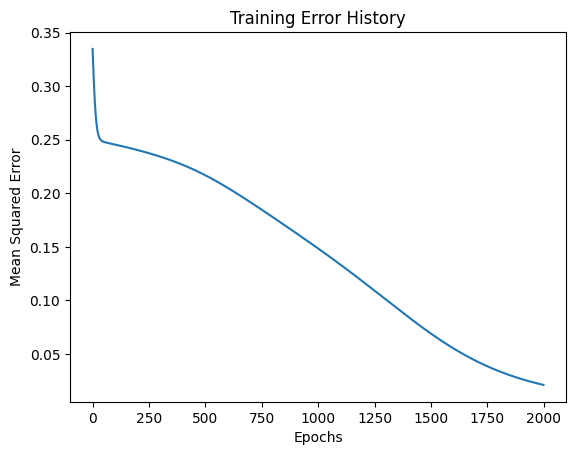

In [8]:
plt.plot(model.error_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Error History')
plt.show()

[0 1 1 0]


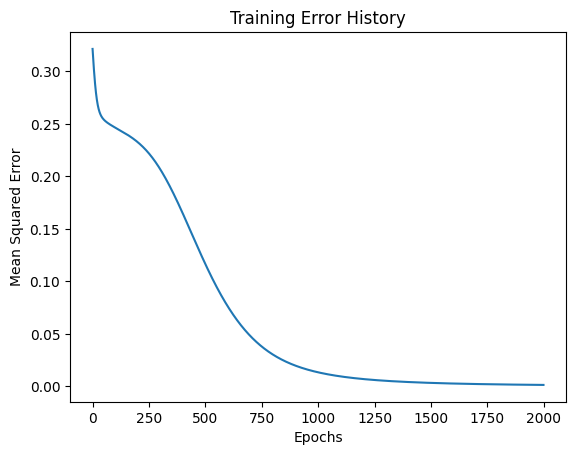

In [9]:
X = normalize(xor_data, ret=True)
model = NN(random_state=42)
model.train(X, xor_labels, epochs=2000)
print(model.predict(X))
plt.plot(model.error_history)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Error History')
plt.show()

In [10]:
model = NN()
model.train(X, xor_labels, epochs=1000)
print(model.predict(X))

[0 1 1 0]


As hinted above, we see that normalizing the data first does lead to faster convergence.

## Task 9.1.3: MNIST (BONUS)

* Train your network on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and state the model accuracy (or the model error) for the training and test sets. **(RESULT)** 
* Compare to this [list](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354) and report on the performance of your model. **(RESULT)**

In [ ]:
# You can access MNIST using torchvision (https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html)
import torchvision.datasets as datasets

mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=None)

mnist_train_data = mnist_train.data.numpy()
mnist_train_labels = mnist_train.targets.numpy()
mnist_test_data = mnist_test.data.numpy()
mnist_test_labels = mnist_test.targets.numpy()

In [ ]:
images, labels = mnist_train_data[:5], mnist_train_labels[:5]

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axes[i].set_title(labels[i])
    axes[i].imshow(images[i], cmap='gray')

In [ ]:
mnist_train_data_, mean, mu = normalize(mnist_train_data.reshape([-1, 28*28]))
mnist_train_labels_ = onehot(mnist_train_labels, 10)

In [ ]:
# TODO: Implement
print(mnist_train_data_.shape)

In [ ]:
print(mnist_train_data.shape)

Ok-ish performance (error-rate 7%+), still a large gap to state-of-the-art models (error-rate 0.21%).

## Congratz, you made it! :)